## Diff-In-Diff Analysis

This notebook walks through the different linear regression models generted using the treatment/control dataset generated earlier. First, a baseline model is created using only the necessary components to set up the diff-in-diff analysis: Treatment, Time_Frame, Interaction. Here, the interaction term represents the average treatment effect on baseline engagment (standard deviations of square root engagement) of a single viral post. This baseline model has the following coefficients:
 
a. `Treatment`: Expected change in z-score square root engagement (SRE) per viral post, independent of time. Represented in standard deviations of SRE.
b. `Time_Frame`: Expected standard deviations change in SRE with no viral post.
c. `Treatment-Time_Frame-Interaction`: Expected standard deviations change in SRE per viral post, controlling for effects of time. This coefficient represents the per viral post Average Treatment Effect and primary metric of interest.

Later in the notebook, we control for the following variables and determine whether the addition of these control variables significantly affects the interaction coefficient at the optimal window size (`w=20 posts`). These results are posted in the final report and conclusively show that these control variables do not change the underlying pattern identified using the baseline model.

- Month - Month that it was posted
- Post type - Instagram TV, Reel, Photo
- Number of Posts - Company based metric to define the posting frequency for the company

Finally, we generate the following tables to help summarize the results of this causal experiment:

1. Sensitivity Plot: Sensitivity plot of the causal effect (interaction coefficient) for different window sizes. The results show an initial decrease in engagement immediately after the viral post (10 post window) followed by a gradual increase in engagement (20-30 post window).

2. P-Value Plot: Plot of the P-Values for varying window sizes. This plot emphasizes the problem with bbth small window sizes and large window sizes. The former not providing enough context to produce definitive results, and the latter not having enough observations to draw conclusions.

3. Multicolinearity Analysis: Calculate the VIF values for the model that includes all control variables. The results show non-significant collinearity (<5) between the predictors even with all the control variables. 

_________
#### **Baseline Model**

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Window = 40**

In [3]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window40_regressiondata_pt4.csv")
data["interaction"] = data["Time_Frame"] * data["Treatment"]

X = data[["Time_Frame", "Treatment", "interaction"]]

# Prepare predictors
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model40 = sm.OLS(y, X).fit()
print(model40.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.412
Date:                    Sat, 04 May 2024   Prob (F-statistic):              0.238
Time:                            17:33:56   Log-Likelihood:                -711.63
No. Observations:                     960   AIC:                             1431.
Df Residuals:                         956   BIC:                             1451.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

**Window = 30**

In [15]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window30_regressiondata_pt4.csv")

# Add interaction term
data["interaction"] = data["Time_Frame"] * data["Treatment"]

# Prepare predictors
X = data[["Time_Frame", "Treatment", "interaction"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model30 = sm.OLS(y, X).fit()
print(model30.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.012
Model:                                OLS   Adj. R-squared:                  0.010
Method:                     Least Squares   F-statistic:                     5.340
Date:                    Sat, 04 May 2024   Prob (F-statistic):            0.00117
Time:                            17:43:35   Log-Likelihood:                -1044.0
No. Observations:                    1320   AIC:                             2096.
Df Residuals:                        1316   BIC:                             2117.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

**Window = 20**

In [16]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window20_regressiondata_pt4.csv")

# Add interaction term
data["interaction"] = data["Time_Frame"] * data["Treatment"]

# Prepare predictors
X = data[["Time_Frame", "Treatment", "interaction"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model20 = sm.OLS(y, X).fit()
print(model20.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                  0.003
Method:                     Least Squares   F-statistic:                     2.333
Date:                    Sat, 04 May 2024   Prob (F-statistic):             0.0725
Time:                            17:43:38   Log-Likelihood:                -929.13
No. Observations:                    1200   AIC:                             1866.
Df Residuals:                        1196   BIC:                             1887.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

**Window=10**

In [17]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window10_regressiondata_pt4.csv")

# Add interaction term
data["interaction"] = data["Time_Frame"] * data["Treatment"]

# Prepare predictors
X = data[["Time_Frame", "Treatment", "interaction"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model10 = sm.OLS(y, X).fit()
print(model10.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.016
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     7.343
Date:                    Sat, 04 May 2024   Prob (F-statistic):           6.99e-05
Time:                            17:43:41   Log-Likelihood:                -1062.5
No. Observations:                    1320   AIC:                             2133.
Df Residuals:                        1316   BIC:                             2154.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

**Window=5**

In [7]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window5_regressiondata_pt4.csv")

# Add interaction term
data["interaction"] = data["Time_Frame"] * data["Treatment"]

# Prepare predictors
X = data[["Time_Frame", "Treatment", "interaction"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model5 = sm.OLS(y, X).fit()
print(model5.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     3.367
Date:                    Sat, 04 May 2024   Prob (F-statistic):             0.0180
Time:                            17:36:59   Log-Likelihood:                -1000.6
No. Observations:                    1180   AIC:                             2009.
Df Residuals:                        1176   BIC:                             2029.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

________
## Control for Month


**Window=20**

In [10]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window20_regressiondata_pt4.csv")
data = pd.get_dummies(data, columns=["Month"], drop_first=True)
data["interaction"] = data["Time_Frame"] * data["Treatment"]

X = data[
    ["Treatment", "Time_Frame", "interaction"]
    + [col for col in data.columns if "Month_" in col]
]

# Prepare predictors
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model20 = sm.OLS(y, X).fit()
print(model20.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.052
Model:                                OLS   Adj. R-squared:                  0.040
Method:                     Least Squares   F-statistic:                     4.601
Date:                    Sat, 04 May 2024   Prob (F-statistic):           3.41e-08
Time:                            17:38:31   Log-Likelihood:                -900.87
No. Observations:                    1200   AIC:                             1832.
Df Residuals:                        1185   BIC:                             1908.
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

_______
## Control for Post Type

**Window=20**

In [12]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window20_regressiondata_pt4.csv")
data = pd.get_dummies(data, columns=["Type"], drop_first=True)
data["interaction"] = data["Time_Frame"] * data["Treatment"]

X = data[
    ["Treatment", "Time_Frame", "interaction"]
    + [col for col in data.columns if "Type_" in col]
]

# Prepare predictors
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model20 = sm.OLS(y, X).fit()
print(model20.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.008
Model:                                OLS   Adj. R-squared:                  0.002
Method:                     Least Squares   F-statistic:                     1.415
Date:                    Sat, 04 May 2024   Prob (F-statistic):              0.195
Time:                            17:41:11   Log-Likelihood:                -927.67
No. Observations:                    1200   AIC:                             1871.
Df Residuals:                        1192   BIC:                             1912.
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

______
## Control for Post Frequency

**Window=20**

In [13]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv("window20_regressiondata_pt4.csv")

# Add interaction term
data["interaction"] = data["Time_Frame"] * data["Treatment"]

# Prepare predictors
X = data[["Time_Frame", "Treatment", "interaction", "num_posts"]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model20 = sm.OLS(y, X).fit()
print(model20.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.004
Method:                     Least Squares   F-statistic:                     2.134
Date:                    Sat, 04 May 2024   Prob (F-statistic):             0.0746
Time:                            17:41:39   Log-Likelihood:                -928.36
No. Observations:                    1200   AIC:                             1867.
Df Residuals:                        1195   BIC:                             1892.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

______
## Control for All Three Control Variables

In [22]:
import pandas as pd
import statsmodels.api as sm


data = pd.read_csv("window20_regressiondata_pt4.csv")
data = pd.get_dummies(data, columns=["Month","Type"], drop_first=True)
data["interaction"] = data["Time_Frame"] * data["Treatment"]

X = data[
    ["Treatment", "Time_Frame", "interaction", "num_posts"]
    + [col for col in data.columns if "Type_" in col or "Month_" in col]
]

# Prepare predictors
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Prepare response variable
y = data["sqrt_engagement_zscore"]

# Build and fit the model
model20 = sm.OLS(y, X).fit()
print(model20.summary())

                              OLS Regression Results                              
Dep. Variable:     sqrt_engagement_zscore   R-squared:                       0.055
Model:                                OLS   Adj. R-squared:                  0.040
Method:                     Least Squares   F-statistic:                     3.603
Date:                    Sat, 04 May 2024   Prob (F-statistic):           2.85e-07
Time:                            17:45:14   Log-Likelihood:                -898.79
No. Observations:                    1200   AIC:                             1838.
Df Residuals:                        1180   BIC:                             1939.
Df Model:                              19                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

_______
## Sensitivity Plots

In [18]:
df = pd.DataFrame({
    'Coefficients': [model10.params['interaction'], model20.params['interaction'], model30.params['interaction']],
    'CI Lower': [model10.conf_int().loc['interaction',0], model20.conf_int().loc['interaction',0], model30.conf_int().loc['interaction',0]],
    'CI Upper': [model10.conf_int().loc['interaction',1], model20.conf_int().loc['interaction',1], model30.conf_int().loc['interaction',1]],
    'Window': [10,20,30]
})

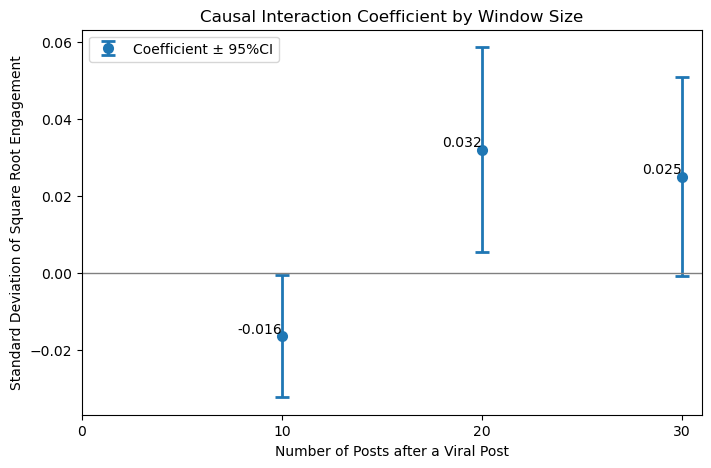

In [19]:
# Plotting
plt.figure(figsize=(8, 5))
# Plotting with error bars
plt.errorbar(df['Window'], df['Coefficients'], 
             yerr=[df['Coefficients'] - df['CI Lower'], df['CI Upper'] - df['Coefficients']], 
             fmt='o', capsize=5, capthick=2, elinewidth=2, markeredgewidth=2, label='Coefficient ± 95%CI')

plt.xlabel('Number of Posts after a Viral Post')
plt.ylabel('Standard Deviation of Square Root Engagement')
plt.title('Causal Interaction Coefficient by Window Size')

# Annotating each point with its coefficient value
for idx, row in df.iterrows():
    plt.text(row['Window'], row['Coefficients'], f"{row['Coefficients']:.3f}", 
             color='black', ha='right', va='bottom')

# Adding only a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=1)


# Manually setting x-ticks:
plt.xticks([0, 10, 20, 30])  # Adding more ticks for visual spacing
plt.grid(False)
plt.legend()
plt.show()

______
## P-Value Plot

In [20]:
p_values = [model5.pvalues['interaction'],
 model10.pvalues['interaction'],
 model20.pvalues['interaction'],
 model30.pvalues['interaction'],
 model40.pvalues['interaction']]
window_sizes = ["5","10","20","30","40"]

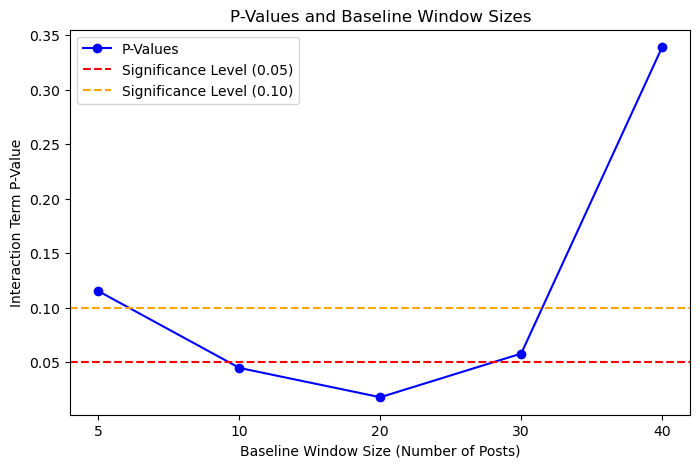

In [21]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(p_values, marker='o', linestyle='-', color='b', label='P-Values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.axhline(y=0.10, color='orange', linestyle='--', label='Significance Level (0.10)')

plt.xlabel('Baseline Window Size (Number of Posts)')
plt.ylabel('Interaction Term P-Value')
plt.title('P-Values and Baseline Window Sizes')
plt.xticks(range(len(window_sizes)), window_sizes)  # Set x-ticks to index of list
plt.legend()
plt.grid(False)
plt.show()

_____
## VIF Multicollinearity Table

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use X from the model that includes all the control variables
# Function to calculate VIF for each predictor
def calculate_vif(X):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_dataframe = calculate_vif(X)
print(vif_dataframe)


        feature        VIF
0         const  34.251276
1     Treatment   2.628344
2    Time_Frame   1.650596
3   interaction   3.192306
4     num_posts   1.362326
5       Month_2   1.618660
6       Month_3   2.254476
7       Month_4   2.124200
8       Month_5   3.611599
9       Month_6   3.771962
10      Month_7   2.487677
11      Month_8   2.583290
12      Month_9   3.573130
13     Month_10   3.068062
14     Month_11   2.796208
15     Month_12   1.712544
16    Type_IGTV   1.017963
17   Type_IMAGE   1.356181
18   Type_VIDEO   1.010281
19    Type_reel   1.339015


_________